data:-https://www.kaggle.com/datasets/nikhil1e9/loan-default

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("Loan_default[1].csv")

#briefly explanation of all features in this Dataset  text

1. LoanID :- each column has a unique loanid. it is unnecessary to predict the target
2. Age :- The age of the borrower
3. Income :- The Annual income of the borrower
4. Loanamount :- The total amount of borrowed
5. CreditScore :- The credit score of the borrower ( A credit score is a number that predicts how likely you are to repay debt  ). at this stage it is important to predict the target
6. MonthsEmployed:- The number of months the borrower has been employed
7. Numcreditlines:- The number of creditlines the borrower has been started
8. interestrate:-the interest on the loan
9. loanterm :-the term length of loan in months
10. DIT Ratio :-Debt-to-income (DTI) ratio is a financial metric that compares your monthly debt payments to your gross monthly income:
11. Education:-The highest level of education attained by the borrrower (["Bachelor's", "Master's", 'High School', 'PhD'])
12. Employmenttype:-The type of employment status of the borrower
13. Maritalstatus :- The maritalstatus of the borrower (single,commited,divorced)
14. Hasdependence :-whether the borrower has dependence (Yes,no)
15. Loanpurpose :- The purpose of the loan ()Auto,Education,business,etc...
16. Hascosinger :- whether the loan has a co-signer
17. Default :- Our target variable. the binary target variable indicating whether the loan defaulted

In [12]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

# Understanding data

In [13]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [14]:
print(f"Total raws ={df.shape[0]} and columns ={df.shape[1]}")

Total raws =255347 and columns =18


In [15]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [16]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [17]:
df.sample(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
198935,1HNEWGP7QS,50,88589,28741,328,102,3,15.91,24,0.47,High School,Self-employed,Married,No,No,Business,Yes,0
178874,4K8DULONQT,37,62134,146425,712,46,3,4.89,12,0.18,PhD,Unemployed,Married,Yes,No,Home,No,0
190875,Q73L7CETGG,34,131772,120840,813,31,2,16.63,48,0.36,Master's,Self-employed,Divorced,No,No,Auto,Yes,0
157817,RR0Z0IVBE1,64,60090,167535,525,57,1,23.78,60,0.67,Master's,Full-time,Divorced,Yes,Yes,Other,No,0
48133,NCUJYQQUFH,19,108229,153162,686,28,4,11.07,36,0.35,High School,Self-employed,Divorced,No,No,Auto,No,0
177102,KMDFPAHGV1,22,117584,64680,642,6,4,10.71,12,0.22,Master's,Unemployed,Married,No,No,Education,Yes,0
224017,STFL15HIAS,24,142495,83833,586,11,2,9.21,36,0.17,High School,Part-time,Married,Yes,No,Education,No,0
148789,9I9DKEYSE2,34,98303,190542,451,71,3,3.80,12,0.83,PhD,Self-employed,Single,Yes,No,Other,No,0
141064,86GAAEU7CP,69,56722,126786,518,62,3,15.92,24,0.63,PhD,Full-time,Single,Yes,No,Education,Yes,0
192690,WUQ9UJJJ0N,33,97097,225374,612,6,2,19.35,60,0.47,High School,Self-employed,Single,Yes,Yes,Business,No,0


In [18]:
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [20]:
df.index

RangeIndex(start=0, stop=255347, step=1)

In [21]:
# to print all numeric columns
for colum in df.columns:
  if df[colum].dtype ==int or df[colum].dtype == float:
     print(colum)

Age
Income
LoanAmount
CreditScore
MonthsEmployed
NumCreditLines
InterestRate
LoanTerm
DTIRatio
Default


In [22]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [23]:
df.nunique()

LoanID            255347
Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64

In [24]:
# to show the total sell counts in the dataset
df.size

4596246

In [25]:
# to show the high salary obtaining employees
x = df['Income'].nlargest(5)
print(x)
df.loc[x.index]

183400    149999
252244    149999
8905      149997
203080    149997
25909     149996
Name: Income, dtype: int64


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
183400,ZQGVAT7T79,59,149999,87625,344,98,2,2.58,12,0.72,Bachelor's,Part-time,Single,No,No,Business,No,0
252244,VOXXF484TC,29,149999,167765,387,68,3,10.70,36,0.83,High School,Part-time,Single,Yes,Yes,Other,No,0
8905,W3UWERC20V,55,149997,112151,466,102,1,10.29,48,0.77,PhD,Unemployed,Married,Yes,Yes,Other,No,0
203080,DFK5DI3QM7,66,149997,189088,395,91,2,22.37,48,0.14,Bachelor's,Self-employed,Divorced,Yes,Yes,Other,No,0
25909,3MYPEH1E67,43,149996,230918,616,89,2,7.36,12,0.18,High School,Part-time,Single,No,Yes,Education,Yes,0


In [26]:
# memmory usage of each columns in the dataframe in bytes
df.memory_usage()

Index                 132
LoanID            2042776
Age               2042776
Income            2042776
LoanAmount        2042776
CreditScore       2042776
MonthsEmployed    2042776
NumCreditLines    2042776
InterestRate      2042776
LoanTerm          2042776
DTIRatio          2042776
Education         2042776
EmploymentType    2042776
MaritalStatus     2042776
HasMortgage       2042776
HasDependents     2042776
LoanPurpose       2042776
HasCoSigner       2042776
Default           2042776
dtype: int64

In [27]:
# Drop LoanID. because no directly relashionship to the target
df.drop(columns='LoanID',inplace=True)

# Data Cleaning

In [28]:
# it returns the count of non null values in each column
df.notnull().sum()

Age               255347
Income            255347
LoanAmount        255347
CreditScore       255347
MonthsEmployed    255347
NumCreditLines    255347
InterestRate      255347
LoanTerm          255347
DTIRatio          255347
Education         255347
EmploymentType    255347
MaritalStatus     255347
HasMortgage       255347
HasDependents     255347
LoanPurpose       255347
HasCoSigner       255347
Default           255347
dtype: int64

In [29]:
# check for count of total null values
# THE DATASET IS ALREADY CLEANED ONE
df.isnull().sum().sum()

np.int64(0)

In [30]:
# check for duplicated raws
df.duplicated().sum()

np.int64(0)

# Discriptive statistices

In [31]:
print(df.sample(100).to_string())

        Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose HasCoSigner  Default
74617    39  146689       96154          452              89               2         15.89        48      0.18  High School      Full-time       Married          No            No        Auto         Yes        0
129774   68   35922       13047          460              29               1         17.50        24      0.11  High School      Full-time      Divorced          No           Yes    Business          No        0
244282   67   79944      175703          594              63               3         19.21        12      0.14   Bachelor's      Full-time        Single         Yes            No   Education         Yes        0
149053   52   20413       16050          714             106               1         12.47        48      0.72   Bachelor's      Part-time        Single

In [32]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [33]:
# standerd diviation of all numeric values()
for column in df.columns:
  if df[column].dtype == int or df[column].dtype == float:
    print('stabderd deviation of ',column)
    print(df[column].std())
    print("_"*50)

stabderd deviation of  Age
14.990258418709589
__________________________________________________
stabderd deviation of  Income
38963.013729378144
__________________________________________________
stabderd deviation of  LoanAmount
70840.70614150059
__________________________________________________
stabderd deviation of  CreditScore
158.9038665949753
__________________________________________________
stabderd deviation of  MonthsEmployed
34.643375637352065
__________________________________________________
stabderd deviation of  NumCreditLines
1.1170176714339635
__________________________________________________
stabderd deviation of  InterestRate
6.636443064944322
__________________________________________________
stabderd deviation of  LoanTerm
16.969330034462832
__________________________________________________
stabderd deviation of  DTIRatio
0.23091661543575948
__________________________________________________
stabderd deviation of  Default
0.3203792764304572
____________________

In [34]:
df["Education"].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [35]:
# frequency counts of each column using a for loop
for colum in df.columns:
   print(column)
   print(df[colum].value_counts())
   print("_"*40)



Default
Age
55    5064
40    5056
65    5027
33    5022
53    5010
62    4999
34    4987
45    4985
61    4982
39    4973
22    4970
32    4969
43    4965
19    4963
35    4961
68    4958
38    4955
30    4954
49    4952
50    4949
27    4945
47    4931
57    4925
54    4921
31    4908
36    4906
44    4906
28    4906
56    4902
26    4891
21    4889
46    4887
18    4884
58    4883
67    4876
51    4876
59    4871
24    4869
29    4865
63    4862
20    4861
37    4856
66    4841
25    4840
64    4840
69    4817
41    4815
48    4810
42    4803
60    4772
52    4748
23    4740
Name: count, dtype: int64
________________________________________
Default
Income
117102    10
69492     10
121985    10
101884     9
31741      9
          ..
137827     1
50663      1
32041      1
31624      1
88245      1
Name: count, Length: 114620, dtype: int64
________________________________________
Default
LoanAmount
221949    8
133724    8
95419     8
183627    7
235258    7
         ..
31272     1
17738

In [36]:
#check for unknowns
df.isin(['unknown']).sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [37]:
for col in df.columns:
  if df[col].dtype == object:
    print(df[col].value_counts())
    print('*'*100)

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
****************************************************************************************************
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
****************************************************************************************************
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
****************************************************************************************************
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
****************************************************************************************************
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
****************************************************************************************************
LoanPurpose
Bu

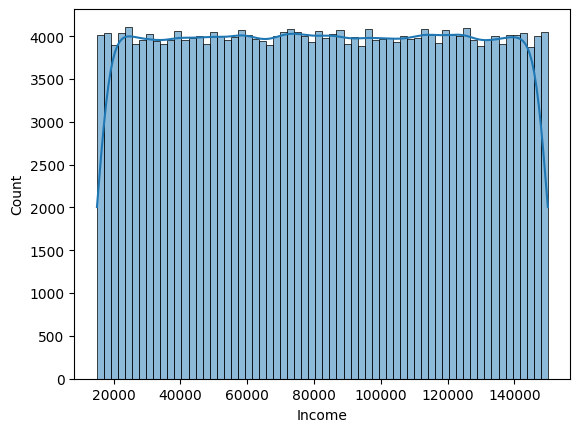

In [38]:
sns.histplot(df['Income'],kde=True)
plt.show()

In [39]:
df.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

# Data Visualization

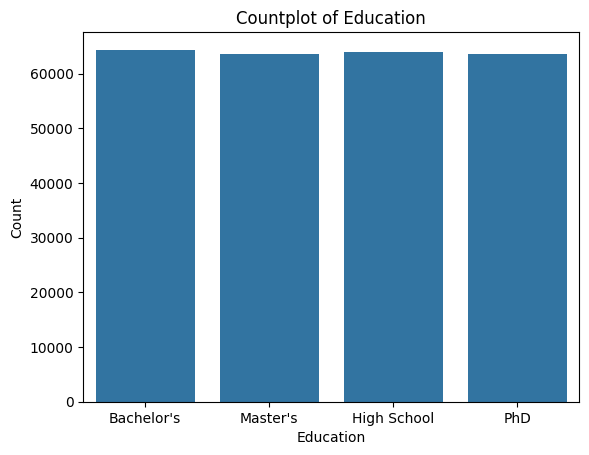

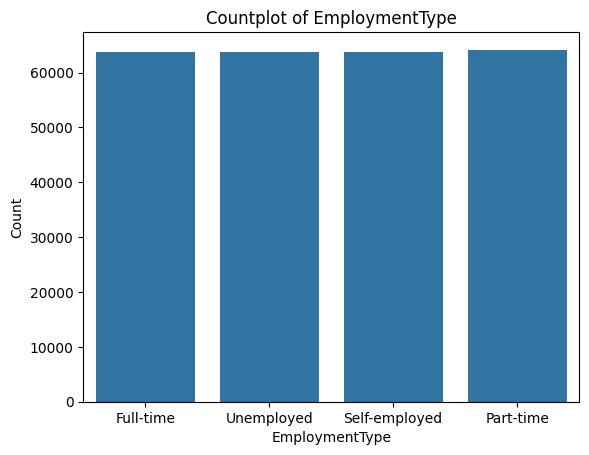

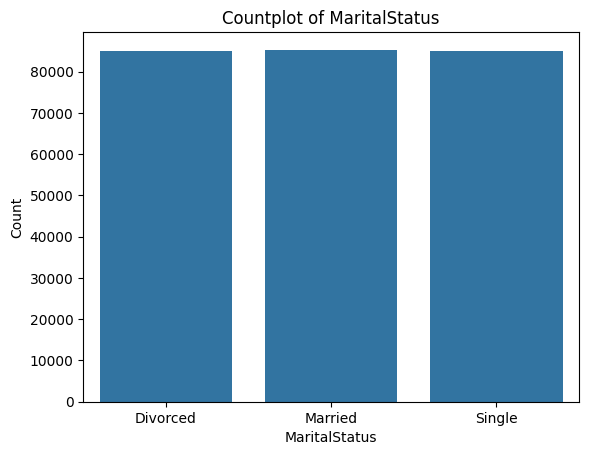

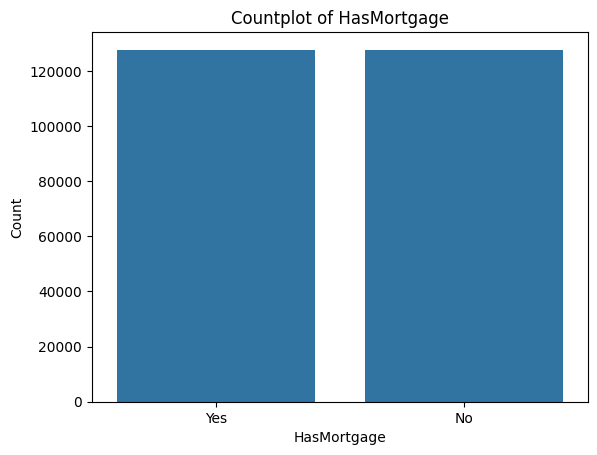

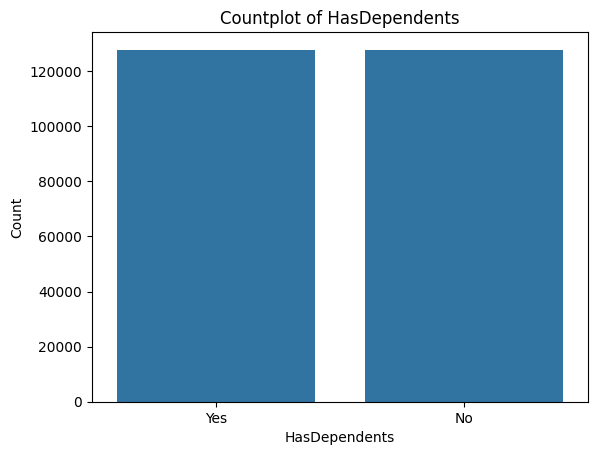

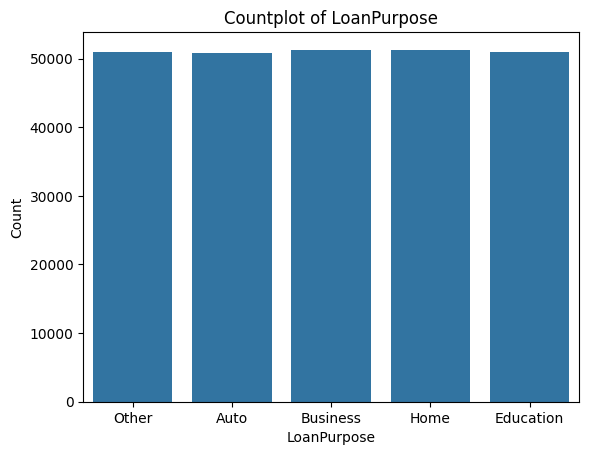

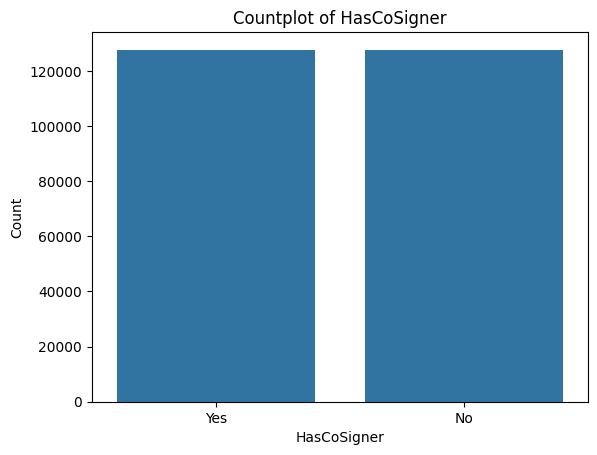

In [40]:
# countplot for all categorical features
for column in df.columns:
  if df[column].dtype== object:
    sns.countplot(data=df,x=column)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

can understand from the countplot informations, that the categorical features in this dataset is almost same value counts in each column

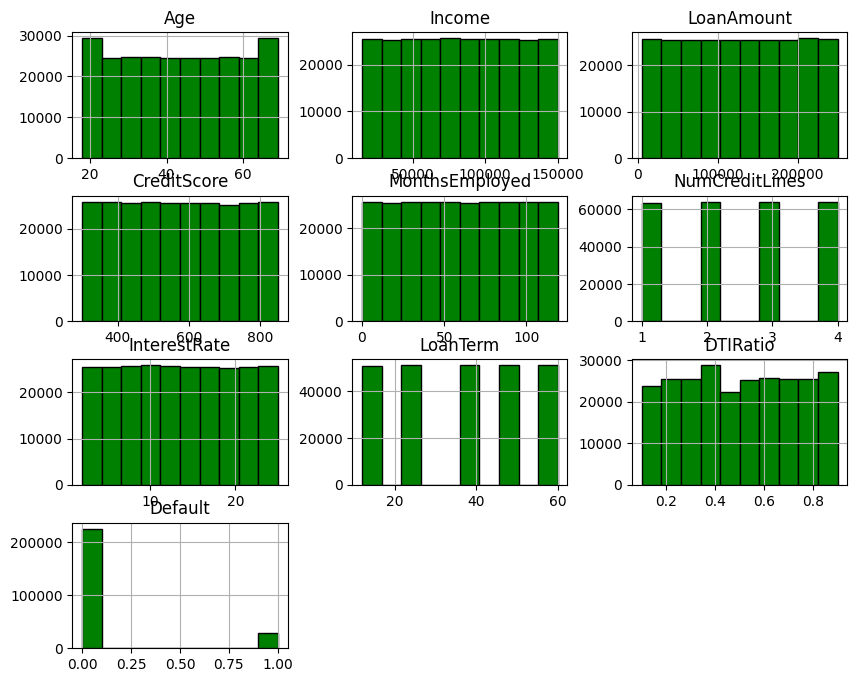

In [41]:
df.hist(color="green",edgecolor="black",figsize=(10,8))
plt.title('histogram for all numerical features',family='monospace',color="blue",size=15)
plt.show()

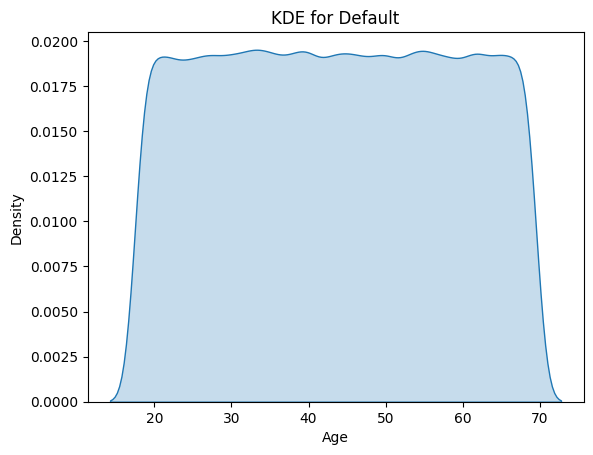

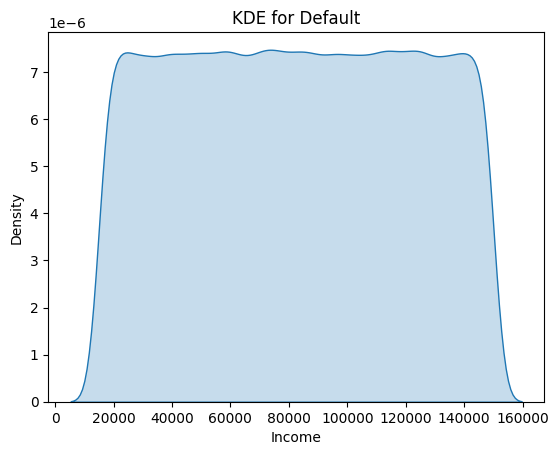

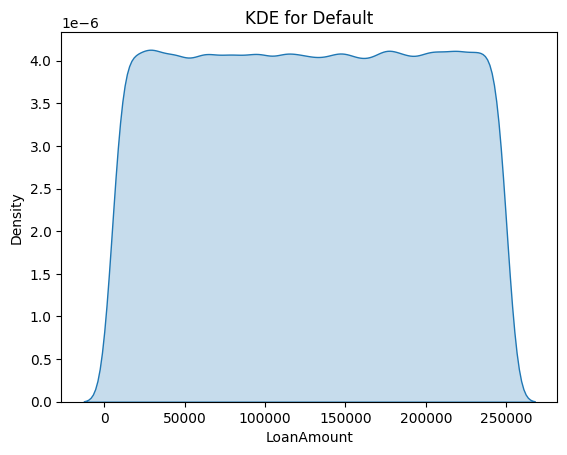

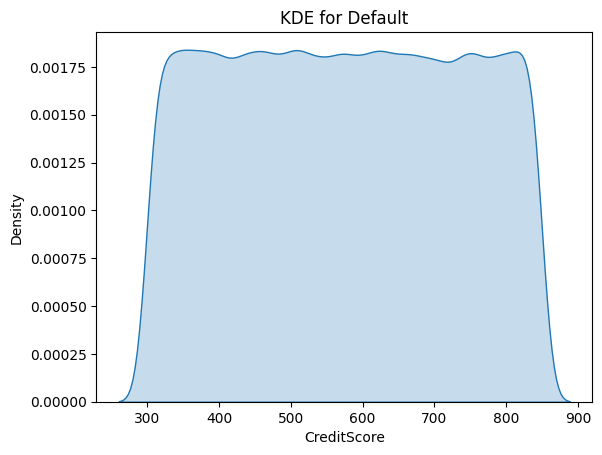

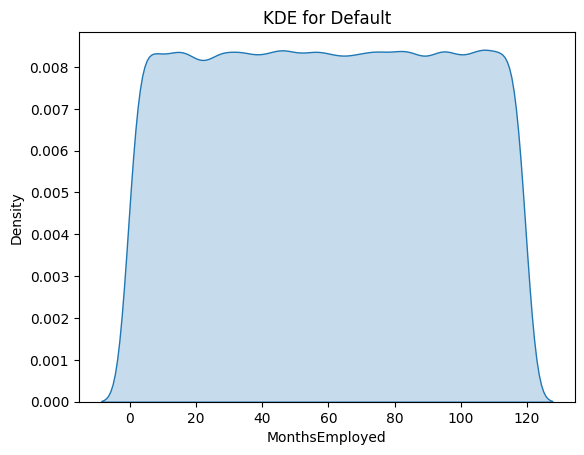

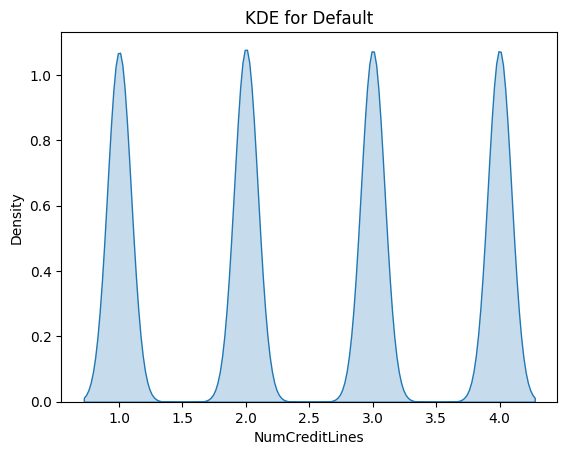

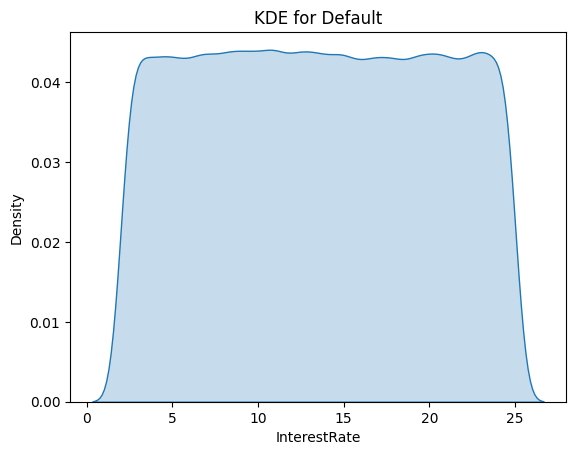

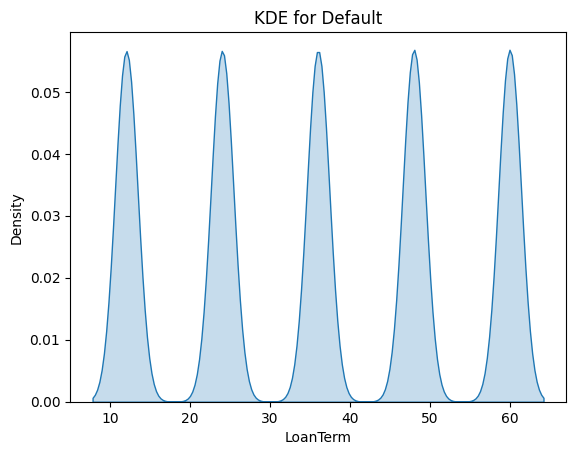

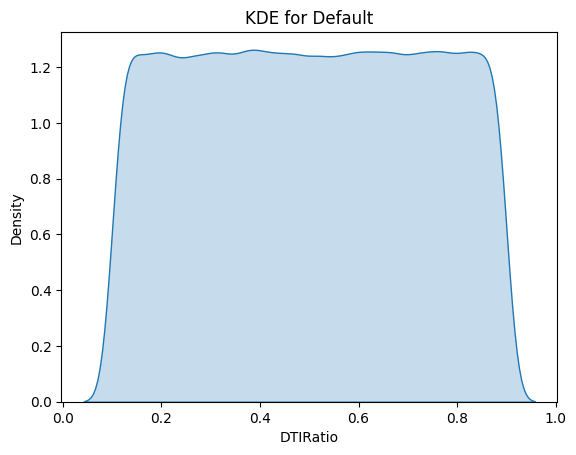

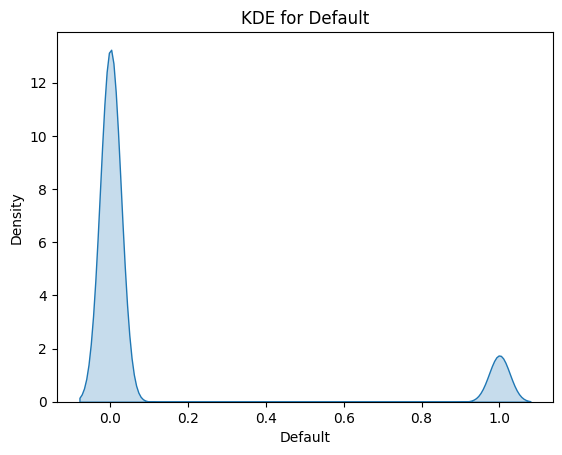

In [42]:
numerical_columns = df.select_dtypes(include=['number']).columns
for x in numerical_columns:
  if df[x].dtype == int or float:
    sns.kdeplot(data=df,x=x, fill=True)
    plt.title(f'KDE for {column}')
    plt.show()

its loook like all columns in the dataset is normally distributed

In [43]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

<Axes: xlabel='LoanAmount'>

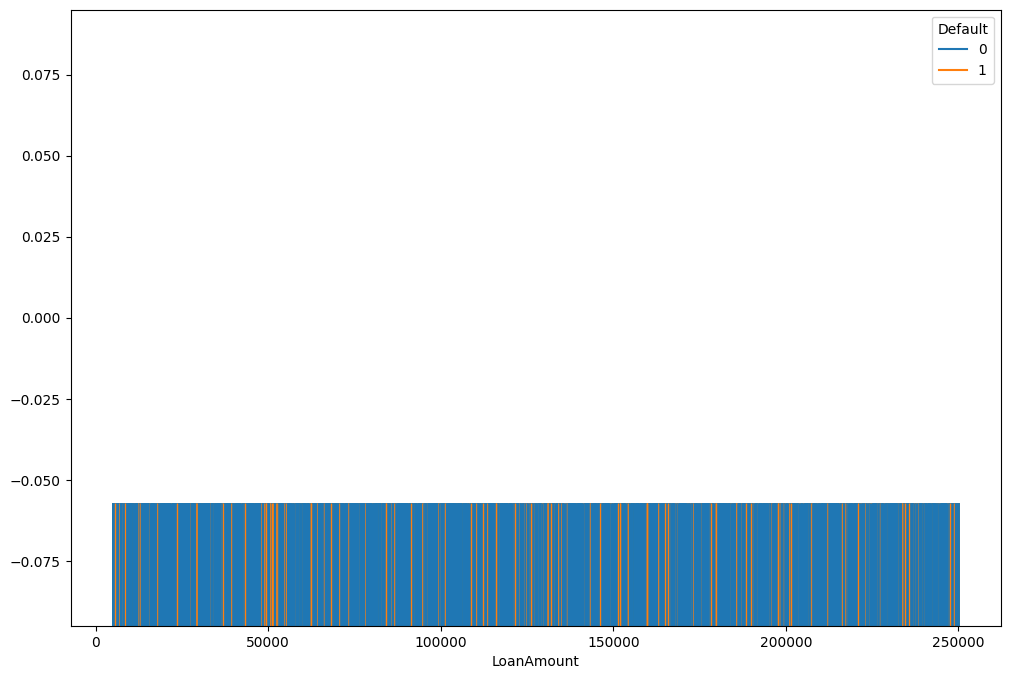

In [44]:
plt.figure(figsize=(12,8))
sns.rugplot(x="LoanAmount",data=df,height=0.2,hue="Default")

# Correlation Analysis

for correlation, we need to convert all qualitative variables into quantitative

In [45]:
df.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [46]:
df['Education'].replace(["High School","Bachelor's","Master's","PhD"],[0,1,2,3],inplace=True)

C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\4219821296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace(["High School","Bachelor's","Master's","PhD"],[0,1,2,3],inplace=True)
C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\4219821296.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [47]:
df['EmploymentType'].replace(['Unemployed','Self-employed','Part-time','Full-time'],[0,1,2,3],inplace=True)

C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\1202985545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EmploymentType'].replace(['Unemployed','Self-employed','Part-time','Full-time'],[0,1,2,3],inplace=True)
C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\1202985545.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

In [48]:
dummies=pd.get_dummies(df['MaritalStatus']).astype(int)

In [49]:
df=pd.concat([df,dummies],axis="columns")
df.drop('MaritalStatus',axis=1,inplace=True)

In [50]:
dummy=pd.get_dummies(df['LoanPurpose']).astype(int)
df=pd.concat([df,dummy],axis=1)
df.drop('LoanPurpose',axis=1,inplace=True)

In [51]:
df['HasMortgage'].replace(['No','Yes'],[0,1],inplace=True)

C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\2377732407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HasMortgage'].replace(['No','Yes'],[0,1],inplace=True)
C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\2377732407.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [52]:
df['HasDependents'].replace(['No','Yes'],[0,1],inplace=True)

C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\3480221301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HasDependents'].replace(['No','Yes'],[0,1],inplace=True)
C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\3480221301.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [53]:
df['HasCoSigner'].replace(['No','Yes'],[0,1],inplace=True)

C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\270506310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HasCoSigner'].replace(['No','Yes'],[0,1],inplace=True)
C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_4568\270506310.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

In [54]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasCoSigner,Default,Divorced,Married,Single,Auto,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,1,0,1,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,1,0,0,1,0,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,0,1,1,0,0,1,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,1,0,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1,...,0,0,0,1,0,0,0,0,0,1
255343,32,51953,189899,511,14,2,11.55,24,0.21,0,...,0,1,1,0,0,0,0,0,1,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,0,...,1,0,0,1,0,1,0,0,0,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0,...,0,0,0,0,1,0,0,0,0,1


<Axes: >

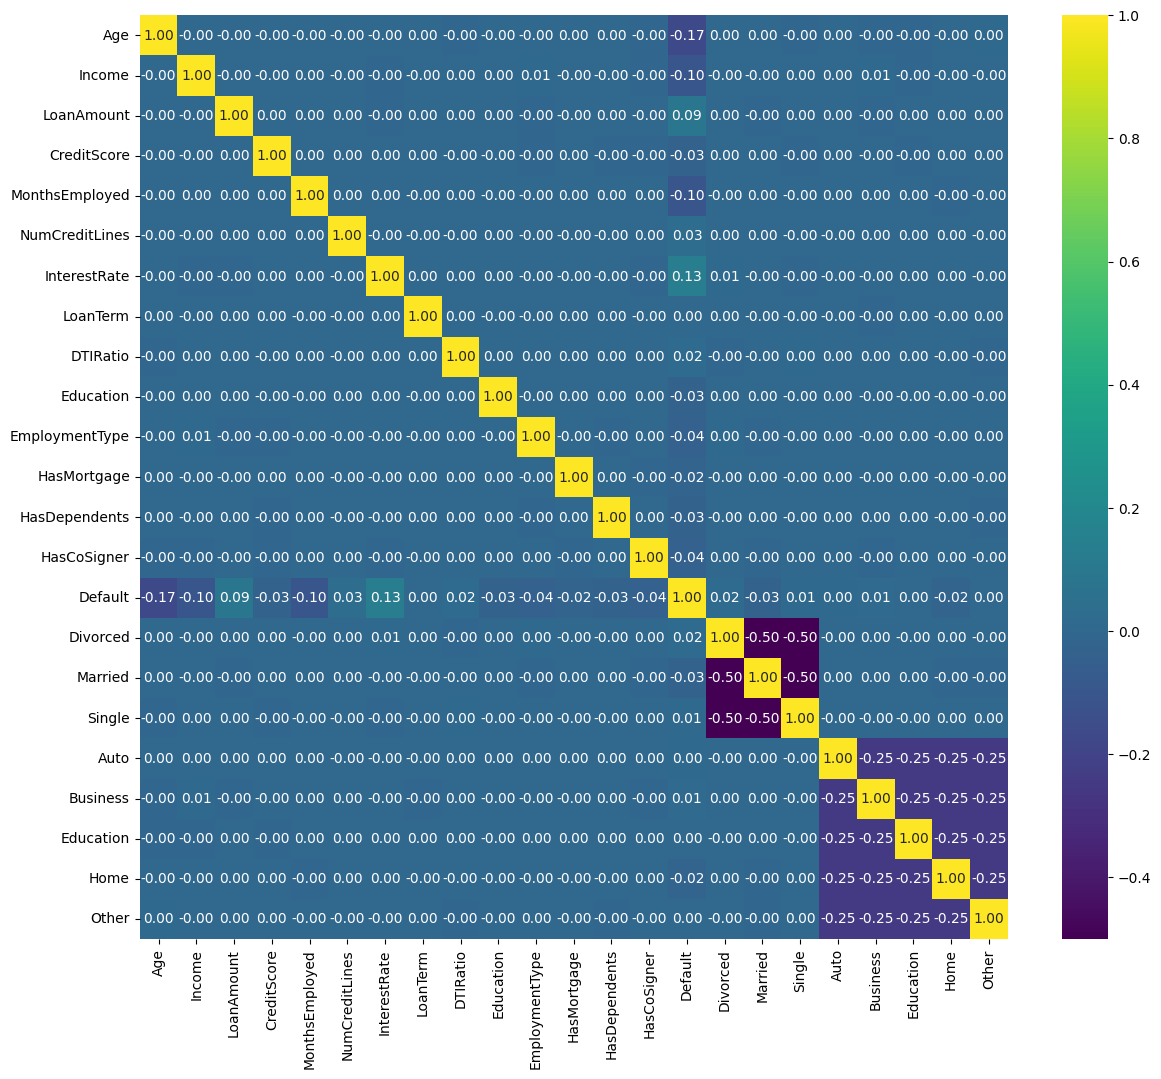

In [55]:
correlation_metrix=df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(correlation_metrix,annot=True,fmt='.2f',cmap='viridis')

In [56]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'HasMortgage', 'HasDependents', 'HasCoSigner',
       'Default', 'Divorced', 'Married', 'Single', 'Auto', 'Business',
       'Education', 'Home', 'Other'],
      dtype='object')

In [57]:
df.drop(columns={"LoanTerm","DTIRatio","HasMortgage","Divorced","Married","Single","Auto","Business","Education","Home","Other"},inplace=True)

<Axes: >

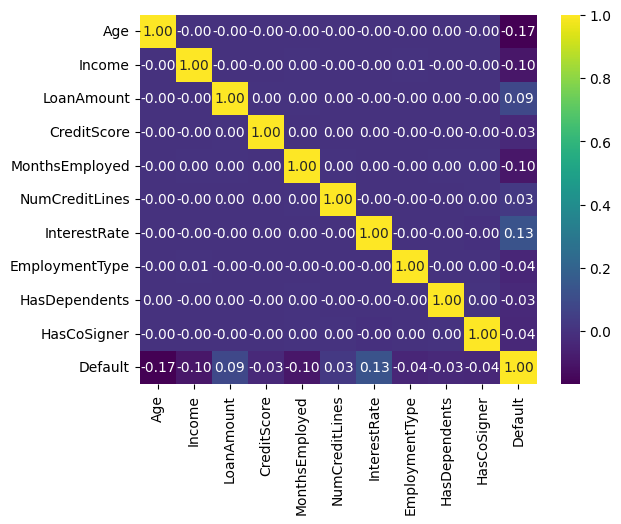

In [58]:
correlation_metrix=df.corr()
sns.heatmap(correlation_metrix,annot=True,fmt='.2f',cmap='viridis')

# outlier detection

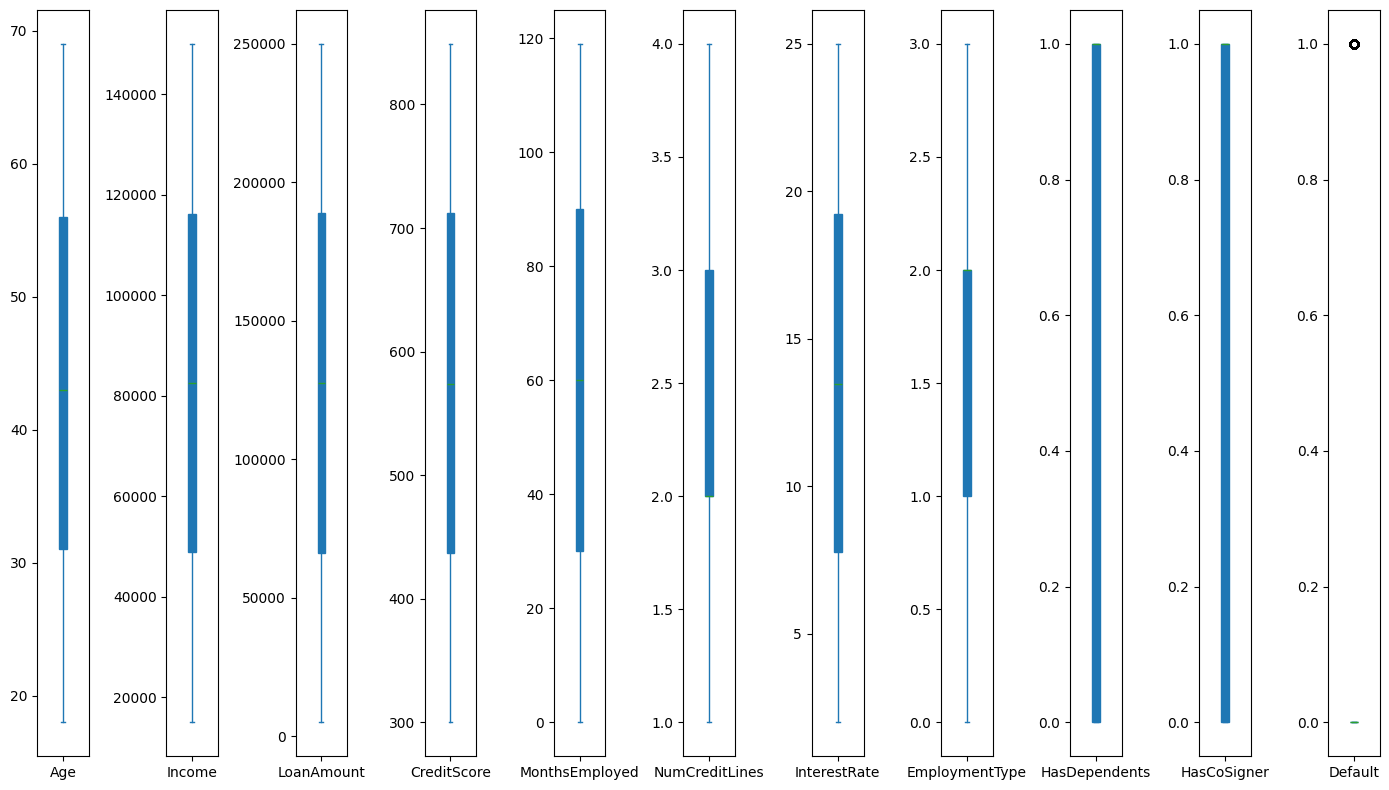

In [59]:
df.plot(kind='box',subplots=True,figsize=(14,8),vert=True,patch_artist=True)
plt.tight_layout()
plt.show()

Here no need to treat outliers

## Handle skewness

In [60]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'EmploymentType', 'HasDependents',
       'HasCoSigner', 'Default'],
      dtype='object')

In [61]:
df.skew()

Age               0.000698
Income           -0.000381
LoanAmount       -0.001827
CreditScore       0.004688
MonthsEmployed   -0.002142
NumCreditLines   -0.000278
InterestRate      0.004608
EmploymentType   -0.001174
HasDependents    -0.001073
HasCoSigner      -0.000431
Default           2.396377
dtype: float64

# Data scaling

In [62]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Standardize the features before PCA
# features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
#        'NumCreditLines', 'InterestRate', 'EmploymentType', 'HasDependents',
#        'HasCoSigner']
# X = StandardScaler().fit_transform(df[features])

# # Apply PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X)

# # Add PCA results to the DataFrame
# df['pca1'] = pca_result[:, 0]
# df['pca2'] = pca_result[:, 1]

# # Visualize PCA results
# sns.scatterplot(x='pca1', y='pca2', hue='Default', data=df)
# plt.title('PCA of Titanic Data')
# plt.show()

In [63]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'EmploymentType', 'HasDependents',
       'HasCoSigner']]=min_max_scaler.fit_transform(df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'EmploymentType', 'HasDependents',
       'HasCoSigner']])

# model Training

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
Y = df['Default']
X = df.drop('Default',axis=1)

In [66]:
print(x.columns)

AttributeError: 'str' object has no attribute 'columns'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape) # shape of X_train
print("X_test shape:", X_test.shape)   # shape of x_test
print("y_train shape:", Y_train.shape) # shape of y_train
print("y_test shape:", Y_test.shape)   # shape of y_test

X_train shape: (51069, 10)
X_test shape: (204278, 10)
y_train shape: (51069,)
y_test shape: (204278,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)

# model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
Cm=confusion_matrix(Y_test,Y_pred)

<Axes: >

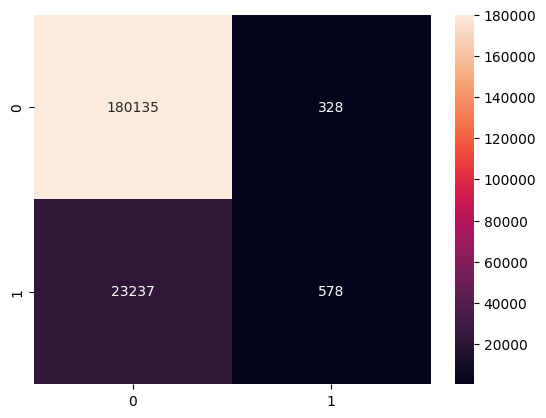

In [ ]:
sns.heatmap(Cm,annot=True,fmt='d')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac=accuracy_score(Y_test,Y_pred)
print(ac)

0.8846424969893968
